In [1]:
#Importing libraries of python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing excel file for our project
train_data=pd.read_excel(r"Kaggle Air flight prediction/Data_Train.xlsx")

In [3]:
#To display all the columns available in data
pd.set_option('display.max_columns',None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#We drop the null values in our dataset as we will be having significant amount of data once we delete them
train_data.dropna(inplace=True)
train_data.isnull().sum() 
#We don't have any null values inside the dataset as aper output below

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.shape # We have 10682 non-null datapoints/rows and 11 features/columns of data

(10682, 11)

In [8]:
##Lot of object datatypes belong to datetime or to be converted to numerical formats

In [9]:
train_data['Journey_Day']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [10]:
train_data['Journey_Month']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [13]:
train_data['Dep_hour']=pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['Dep_min']=pd.to_datetime(train_data.Dep_Time).dt.minute
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [15]:
train_data['Arrival_hour']=pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arrival_min']=pd.to_datetime(train_data.Arrival_Time).dt.minute
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
duration = list(train_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [18]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

#we will remove the Durtaion column
train_data.drop(['Duration'],axis=1,inplace=True)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [20]:
##Handling categorical data with one-hot encoding for nominal data and label encoder for oridnal data

In [21]:
train_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

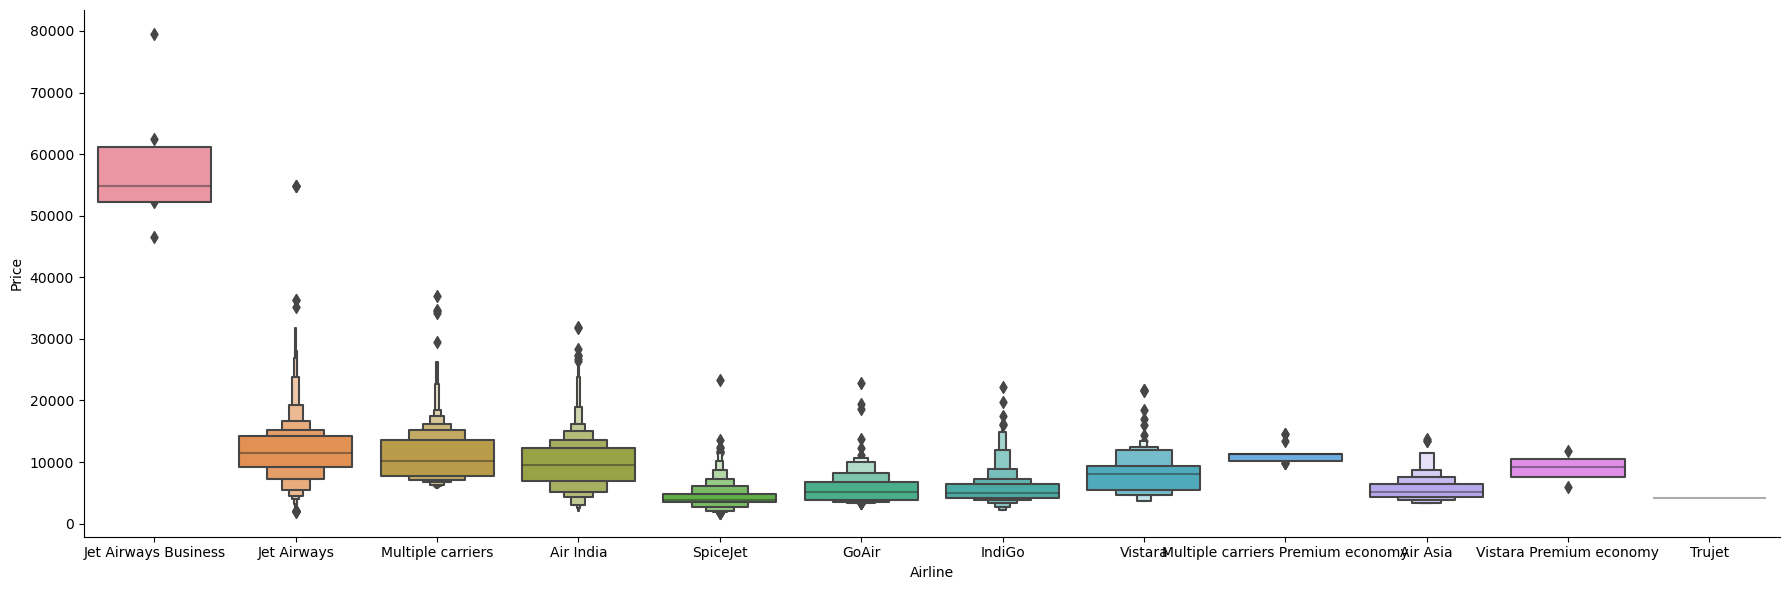

In [22]:
##Airlines VS Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [23]:
#As Airline is nominal category, we will perform one hot encoding
Airline=pd.get_dummies(train_data[['Airline']],drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [24]:
# Source EDA
train_data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

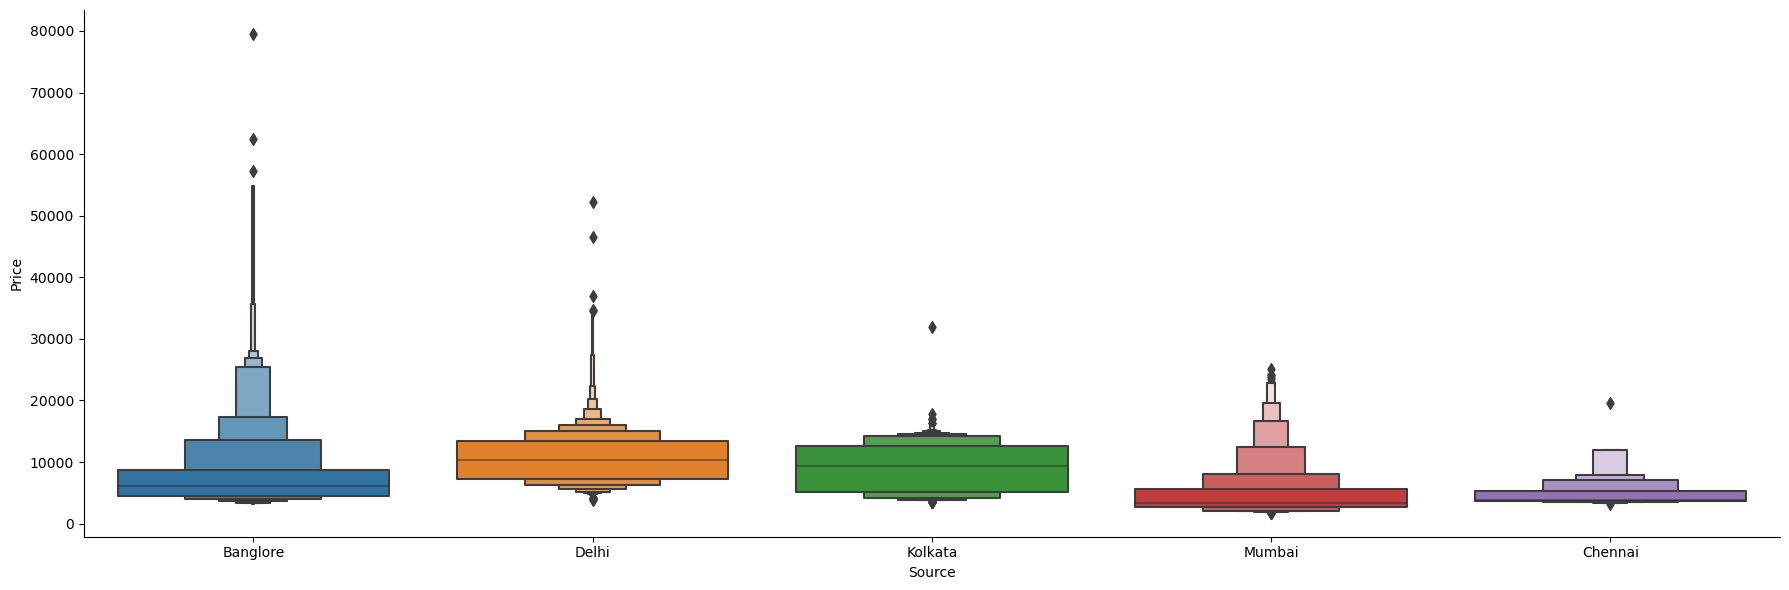

In [25]:
##Sources VS Price
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [26]:
#Since Source is nominal categorical, we can apply One HOt Encoding
Source=train_data[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [27]:
train_data['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

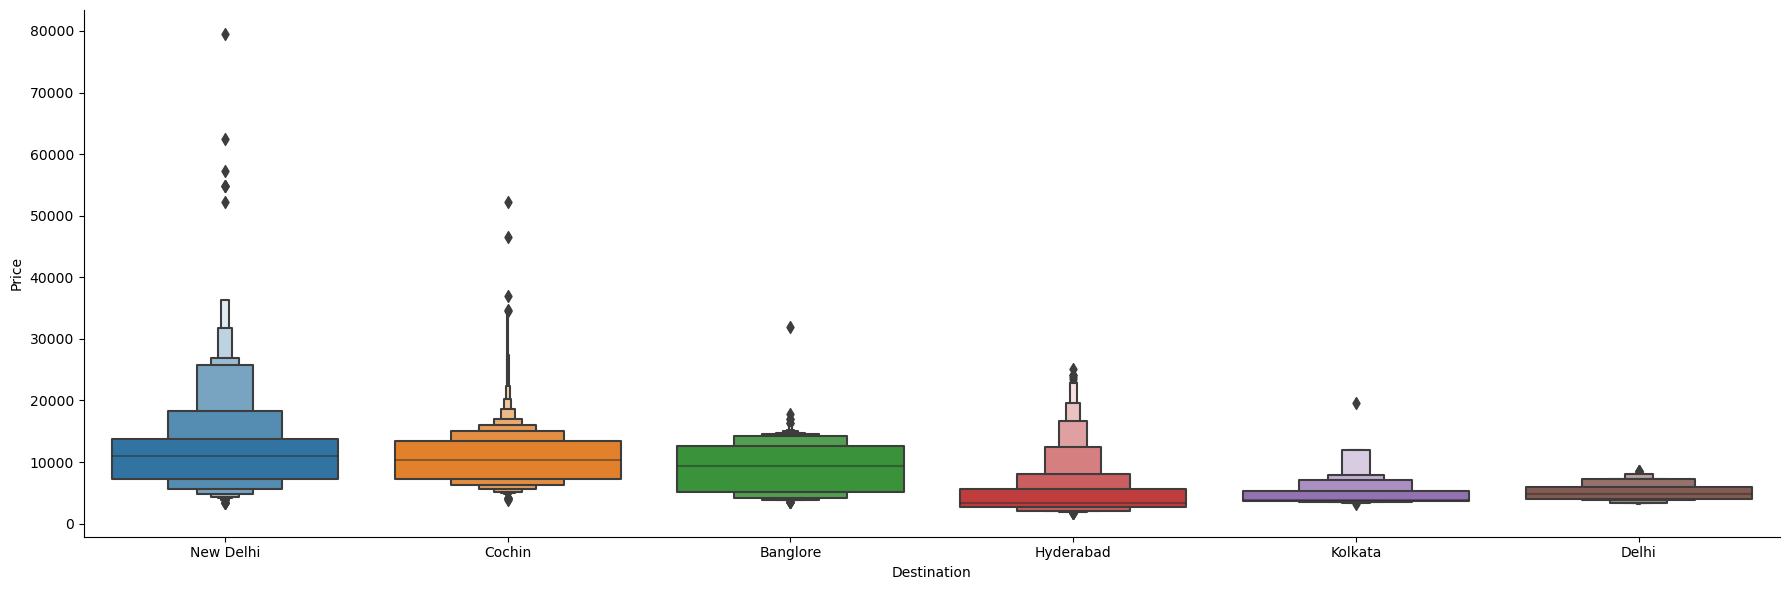

In [28]:
##Destination VS Price
sns.catplot(y = "Price", x = "Destination", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [29]:
#Since Destination is nominal categorical, we can apply One HOt Encoding
Destination=train_data[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [30]:
train_data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

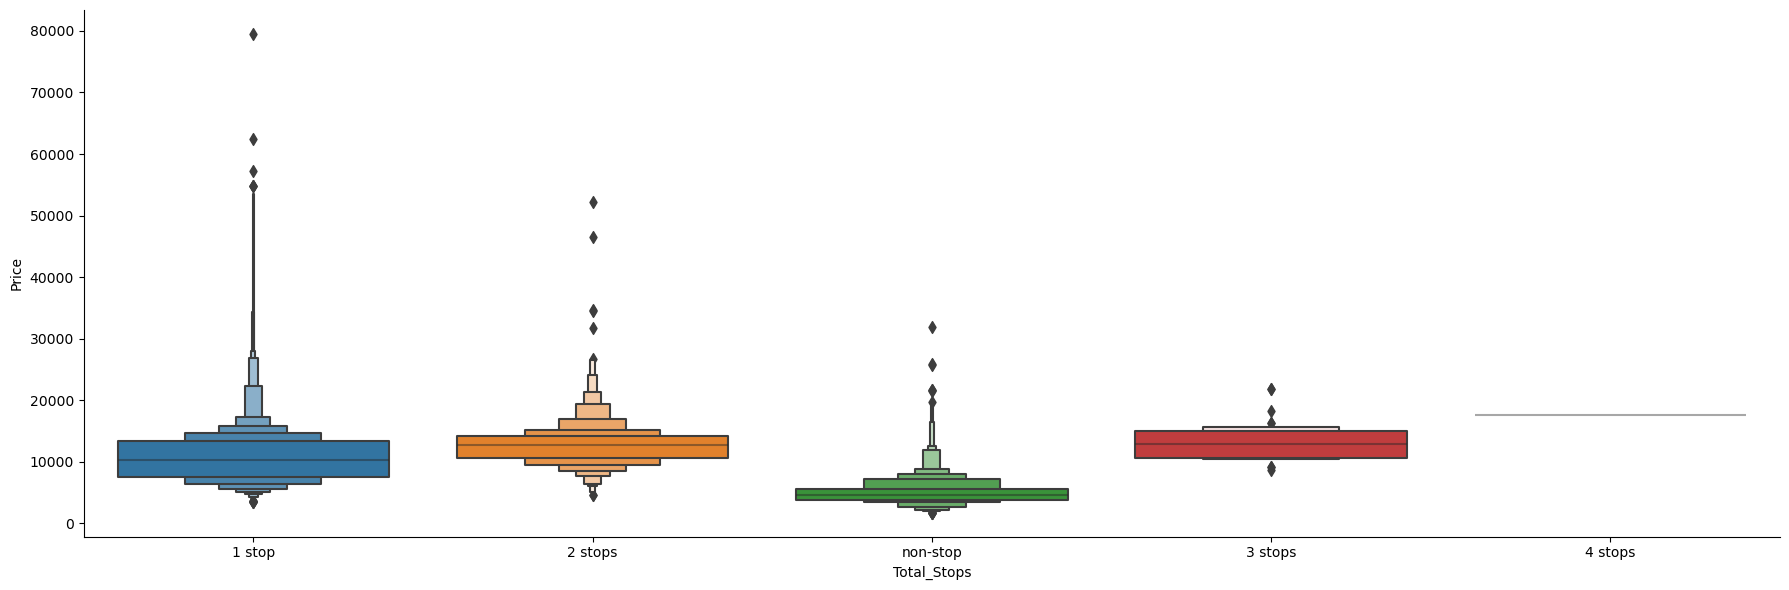

In [31]:
##Total Stops VS Price
sns.catplot(y = "Price", x = "Total_Stops", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [32]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [33]:
#Additional_info can be dropped as there is no data for almost 80% of the data as no_info
#Since Route and total_stops are related to each other, we can drop Route column
train_data.drop(columns=['Additional_Info','Route'],inplace=True)

In [34]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [35]:
train_data.drop(columns=['Airline','Source','Destination'],inplace=True)

In [36]:
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [37]:
data_train.shape

(10682, 30)

In [38]:
y=data_train.loc[:,'Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [39]:
data_train.drop(['Price'],axis=1,inplace=True)

In [41]:
X=data_train.loc[:,:]

In [42]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


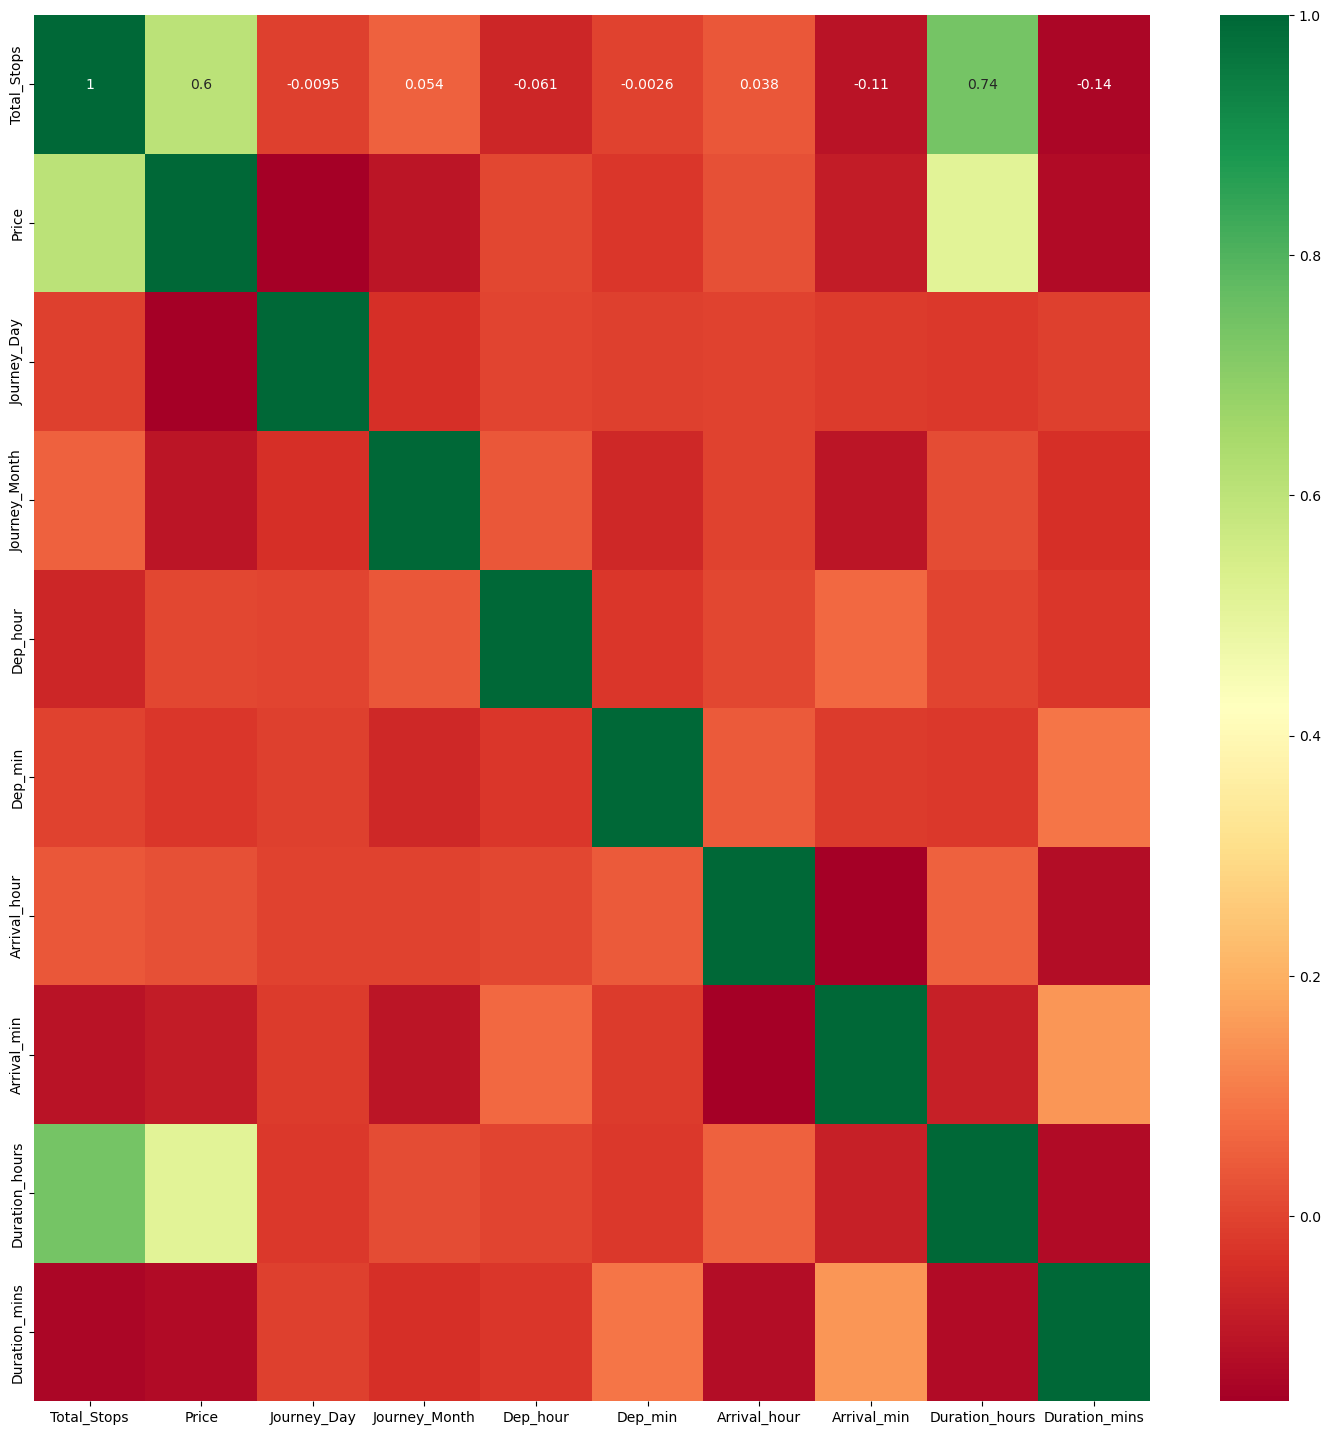

In [45]:
#HeatMap
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [46]:
#Important Features using Extratree regressor
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

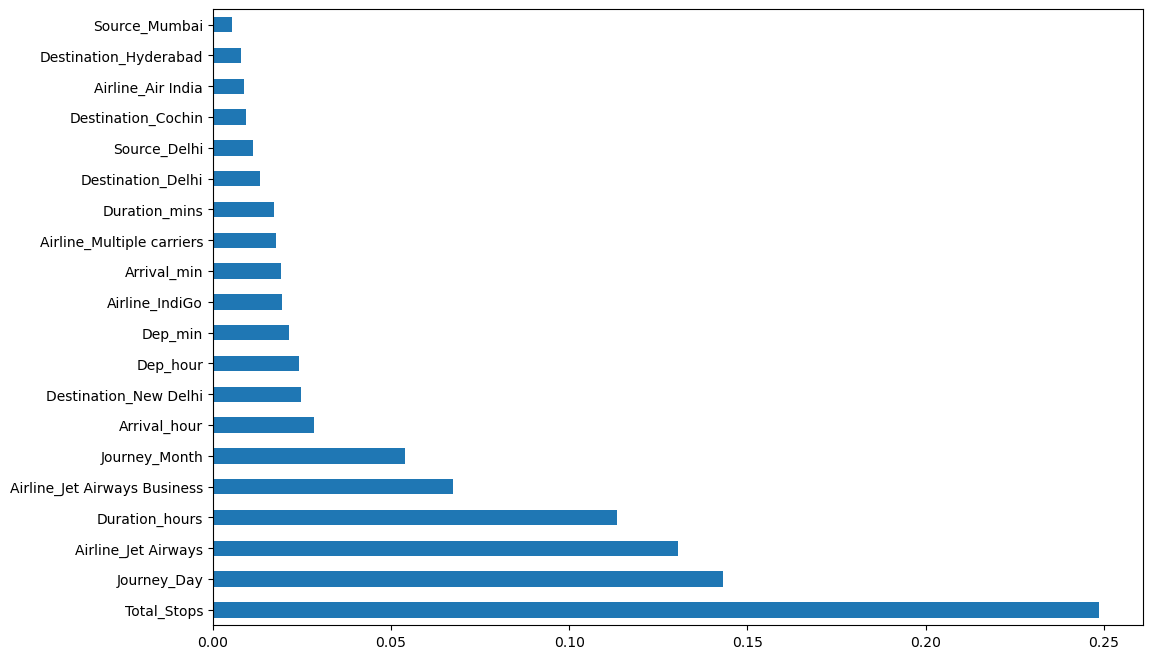

In [47]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [48]:
# import library and feature importance using SelectKBest and chisqure
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#Deifne feature selection
fs=SelectKBest(score_func=chi2)  
# Applying feature selection
X_selected=fs.fit(X,y)

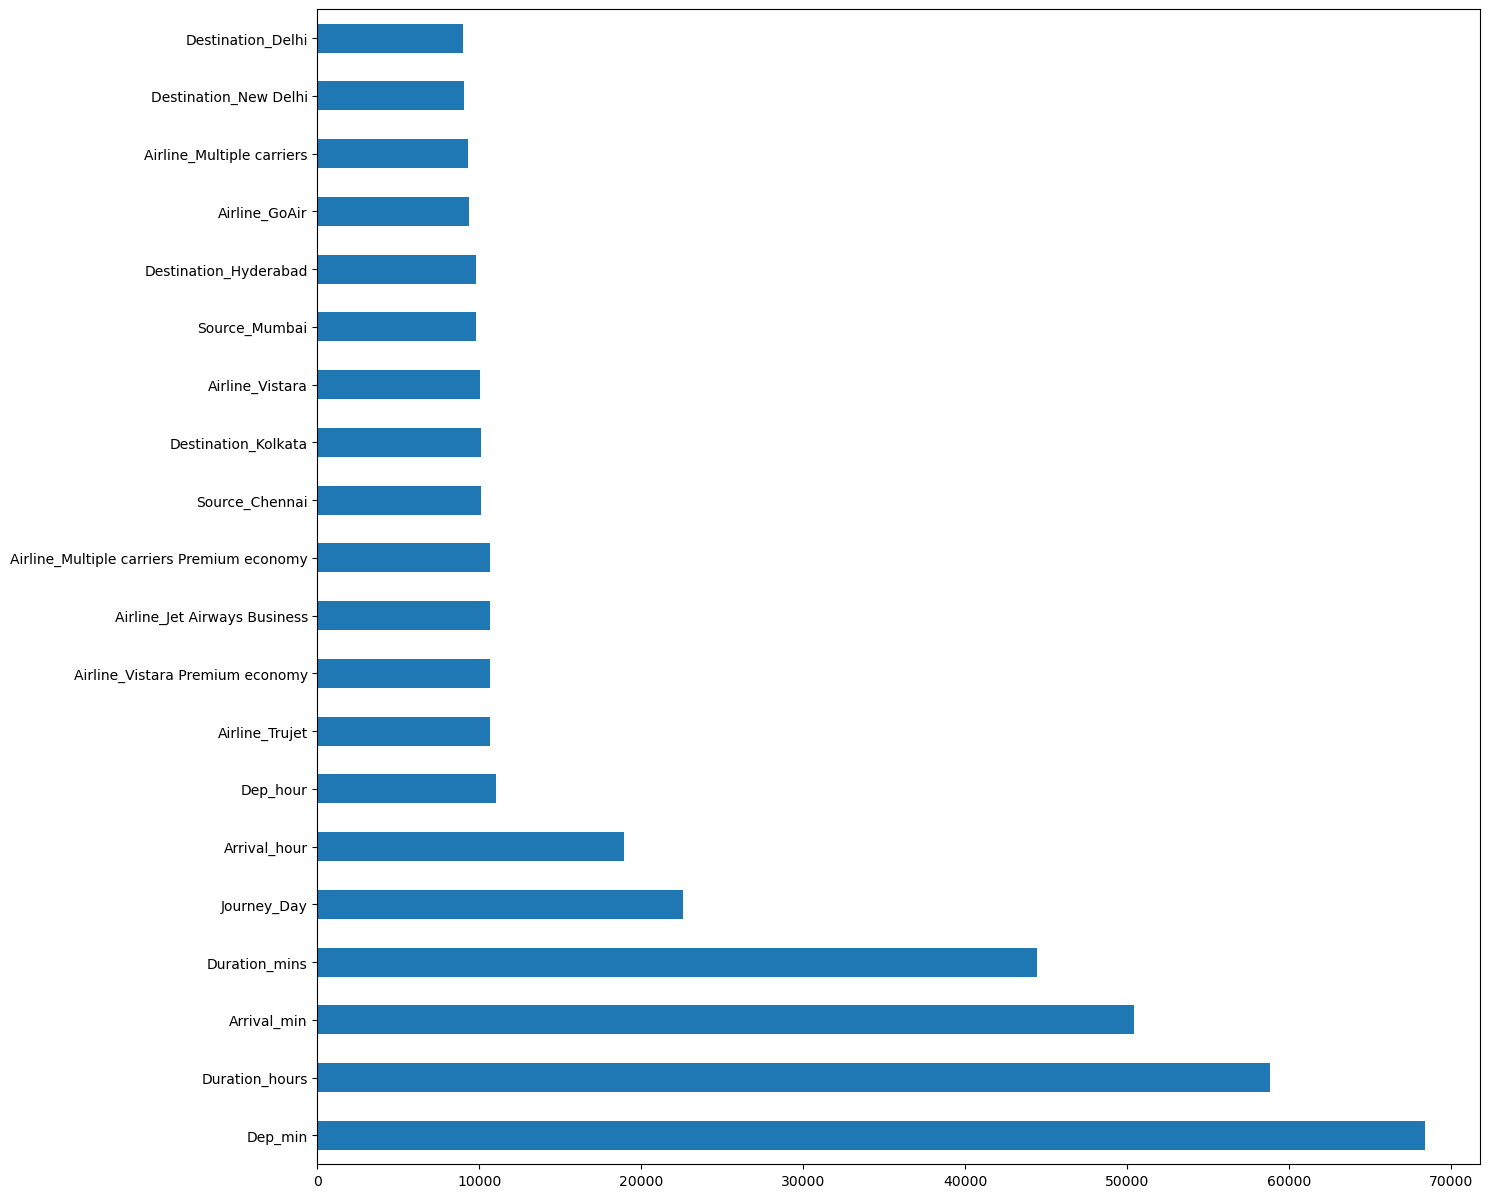

In [50]:
plt.figure(figsize=(15,15))
feat_importances = pd.Series(X_selected.scores_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [51]:
#Splitting the Data into Train & Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=32)

In [52]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()

In [53]:
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [54]:
random_forest.score(x_test,y_test)

0.8186193712839599

In [55]:
random_forest.score(x_train,y_train)

0.9549374924178411

<Axes: xlabel='Price', ylabel='Density'>

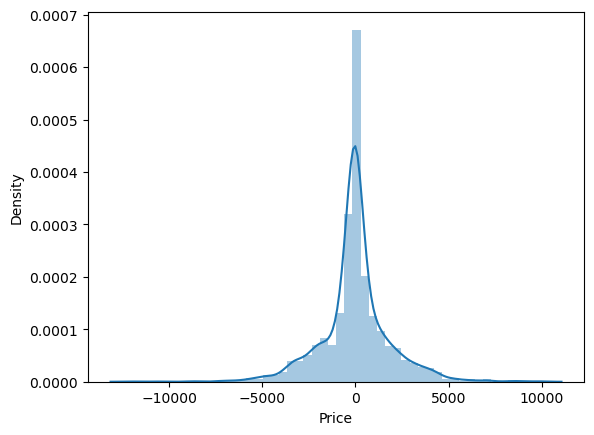

In [56]:
y_pred=random_forest.predict(x_test)
sns.distplot(y_test-y_pred,kde=True)

In [57]:
#On validation data, we got over 81.5% R2 value, we can still perform hyperparameter tuning so as to reduce MSE/RMSE to improve performance of our model.
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1178.6739983397586
MSE: 3407576.9480818296
RMSE: 1845.9623365826915


Text(0, 0.5, 'prediction')

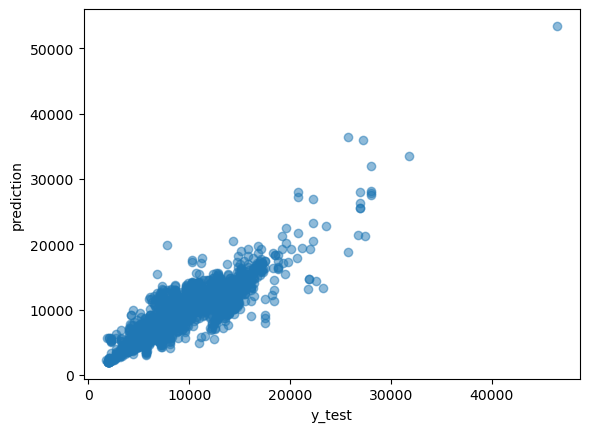

In [58]:
#Plotting scatter graph to check linear relations
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')

In [59]:
# Hyperparameter tuning using Randomized Search CV
#Setting parameter values for consideration
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 8)]
min_samples_split = [2, 5, 10, 15, 100, 120, 150, 200, 250]
min_samples_leaf = [1, 2, 5, 10,15,25,30,35]

In [60]:
random_grid_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [61]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [63]:
random_search=RandomizedSearchCV(estimator=random_forest,param_distributions=random_grid_params,cv=5,n_jobs=-1,verbose=3,scoring='neg_mean_squared_error', n_iter = 10)

In [64]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 12, 15, 19, 22, 26,
                                                      30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             25, 30, 35],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              120, 150, 200,
                                                              250],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=3)

In [65]:
random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 12}

In [67]:
rfst_regresor=RandomForestRegressor(n_estimators=1000,min_samples_split= 2,min_samples_leaf= 1,
 max_features= 'auto', max_depth= 12)

In [69]:
rfst_regresor.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, max_features='auto', n_estimators=1000)

In [71]:
rfst_regresor.score(x_train,y_train)

0.9184814899185761

In [72]:
rfst_regresor.score(x_test,y_test)

0.8383736950610309

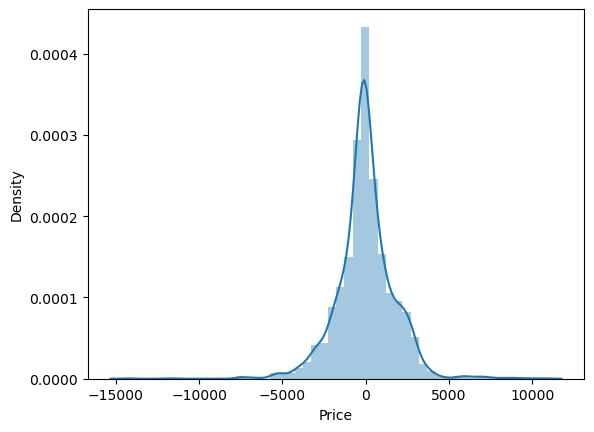

Text(0, 0.5, 'prediction')

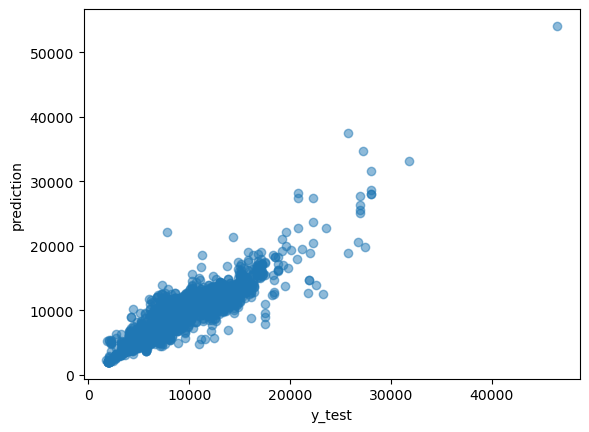

In [74]:
prediction=rfst_regresor.predict(x_test)
#Plotting the error graph and should be mean=0
sns.distplot(y_test-prediction,kde=True)
plt.show()
#Plotting scatter graph to check linear relations
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1196.1877820152042
MSE: 3036454.746090372
RMSE: 1742.5426095480052


In [76]:
#Model Saving in Pickle Format
import pickle
file = open('flight_fare_pred.pkl', 'wb')
pickle.dump(rfst_regresor, file)

In [77]:
#Loading the model saved in pkl format
model = open('flight_fare_pred.pkl','rb')
flight_fare_pedictor = pickle.load(model)

In [78]:
#Predicting Using the Loaded Model
flight_fare_pedictor.score(x_test,y_test)

0.8383736950610309

In [79]:
x_test

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
8396,2,24,6,18,20,4,25,10,5,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
9284,1,9,6,17,30,12,35,19,5,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
10609,0,12,5,12,0,13,30,1,30,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
10229,0,3,3,19,35,22,5,2,30,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3874,1,27,3,2,15,15,30,13,15,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,0,24,3,23,30,2,20,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5663,1,6,5,11,35,18,50,7,15,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
8332,0,27,6,11,30,14,5,2,35,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10453,2,24,6,9,40,12,35,26,55,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
